# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline


# Load Dataset

In [2]:
train = pd.read_csv('dataset/train.csv')
test=pd.read_csv('dataset/test.csv')
#Append train and test to process the entire dataset
titanic=train.append(test)
titanic.reset_index(inplace=True)

C:\Users\kiran.EBPERALS-LOCAL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


# Defining Functions

In [3]:
#Function to dispaly the null count of a column
def isnull(column):
    return titanic[column].isnull().sum()

In [4]:
#Function to display column with null values
def displayallnull():
    nans = lambda df: df[df.isnull().any(axis=1)]
    nans(titanic)
    print (titanic)
# displayallnull()

In [5]:
#Function to encode the categorical features
def labelencode(column):
    titanic[column] = LabelEncoder().fit_transform(titanic[column])

In [6]:
#Function to Place Dummy Variable of a given column
def placedummyvariable(column):
    global titanic
    titles_dummies = pd.get_dummies(titanic[column], prefix=column)
    titanic = pd.concat([titanic, titles_dummies], axis=1)
    titanic.drop(column, axis=1, inplace=True) #Drop originalcolumns after placing dummy columns

# Data Analysis  

In [7]:
titanic.info()
#Provides information of each columns in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
index          1309 non-null int64
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 133.0+ KB


In [8]:
titanic.describe()
# Provides description about invidual columns

index          Age         Fare        Parch  PassengerId  \
count  1309.000000  1046.000000  1308.000000  1309.000000  1309.000000   
mean    369.478992    29.881138    33.295479     0.385027   655.000000   
std     248.767105    14.413493    51.758668     0.865560   378.020061   
min       0.000000     0.170000     0.000000     0.000000     1.000000   
25%     163.000000    21.000000     7.895800     0.000000   328.000000   
50%     327.000000    28.000000    14.454200     0.000000   655.000000   
75%     563.000000    39.000000    31.275000     0.000000   982.000000   
max     890.000000    80.000000   512.329200     9.000000  1309.000000   

            Pclass        SibSp    Survived  
count  1309.000000  1309.000000  891.000000  
mean      2.294882     0.498854    0.383838  
std       0.837836     1.041658    0.486592  
min       1.000000     0.000000    0.000000  
25%       2.000000     0.000000    0.000000  
50%       3.000000     0.000000    0.000000  
75%       3.000000     1.000000    1.000000  
max       3.000000     8.000000    1.000000

In [9]:
#Dimension of training Dataset'
train.shape
#Train dataset contains 891 datas with 12 columns each. Lets look down the 12 columns.

(891, 12)

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

It has 12 columns. Lets look down each column:
1. PassengerId:id of pPassenger
2. Survived: Whether the passenger survived or not (0 = Not Survived; 1 = Survived)
3. Pclass:The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
4. Name: Name of the Passenger
5. Sex: Passenger's sex
6. Age: Age of the Passenger in yrs.
7. SibSp: Number of Siblings/Spouses Aboard
8. Parch: Number of Parents/Children Aboard
9. Ticket: Ticket Number
10. Fare: The Fare the Passenger paid
11. Cabin: Passenger's cabin number
12. Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [11]:
#Dimension of test Dataset
test.shape
# The test dataset contains total 418 rows and 11 columns.

(418, 11)

Lets look top 5 datas in train dataset.

In [12]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

All these columns acts as a Feature for our Model. However, we must have to process the datas inorder to acquire relevant features. Lets first Visualize the Dataset, which can be helpful for processing.

# Visualization

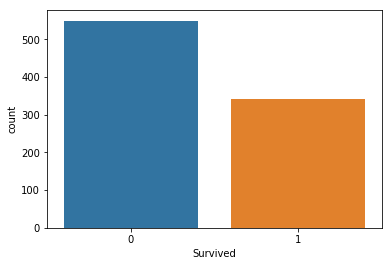

In [13]:
#Number of people survived vs not survived in train dataset
sns.countplot(x='Survived',  data=train)

In [14]:
#Percentage of people Survived vs not-survived in train dataset
print(train["Survived"].value_counts(normalize=True))

0    0.616162
1    0.383838
Name: Survived, dtype: float64


Thus we can conclude that majority of people died. Lets relate survival with other features.

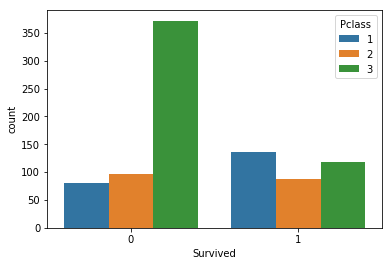

In [15]:
#Count of people survived vs not survived  based on Pclass
sns.countplot(x='Survived', hue="Pclass", data=train)

Passenger of Class 3 died most. Hence, it can be analyzed that if a person is of class 3, it has high chance to die.

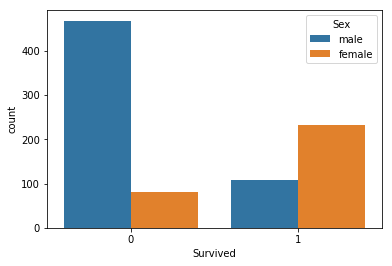

In [16]:
# Survived Vs Not Survied based on sex
sns.countplot(x='Survived', hue="Sex", data=train)


Thus it has higher chance to survive if the person is female.

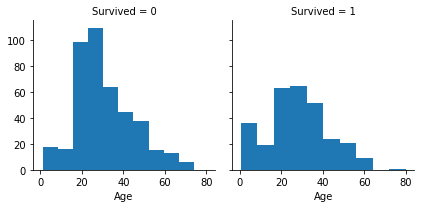

In [17]:
# Survival Vs Not Survival based on Age
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=10)

Infants (Age <=4) had high survival rate. Oldest passengers (Age = 80) survived. Large number of 15-25 year olds did not survive. 

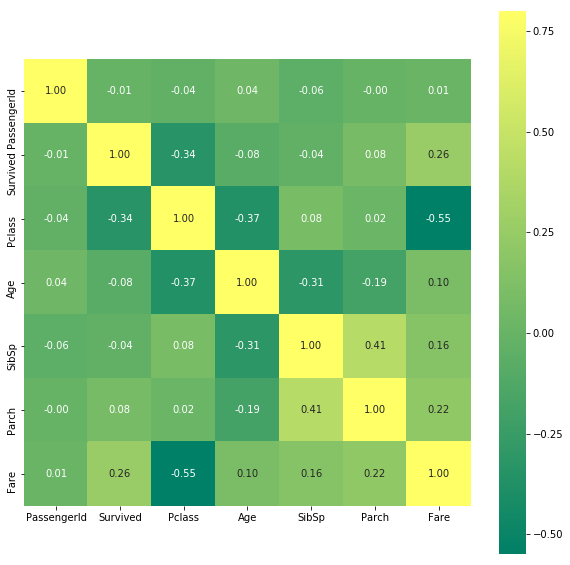

In [18]:
# Correlation between the features
corrmat = train.corr()
r,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap="summer")


# Processing Name

In [19]:
# Each Name of the Passenger contains title. The survival may depends based on the title of the passenger. 
# Extracting Title from each passenger and create numerical indication for each.
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')



title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

titanic['Title'] = titanic['Title'].map(title_mapping)
titanic['Title'] = titanic['Title'].fillna(0)

titanic.drop("Name", axis=1, inplace=True)
titanic.head()


index   Age Cabin Embarked     Fare  Parch  PassengerId  Pclass     Sex  \
0      0  22.0   NaN        S   7.2500      0            1       3    male   
1      1  38.0   C85        C  71.2833      0            2       1  female   
2      2  26.0   NaN        S   7.9250      0            3       3  female   
3      3  35.0  C123        S  53.1000      0            4       1  female   
4      4  35.0   NaN        S   8.0500      0            5       3    male   

   SibSp  Survived            Ticket  Title  
0      1       0.0         A/5 21171      1  
1      1       1.0          PC 17599      3  
2      0       1.0  STON/O2. 3101282      2  
3      1       1.0            113803      3  
4      0       0.0            373450      1

# Processing Age 

In [20]:
isnull('Age')

263

Dataset contains 263 missing values in Ages. Lets fill out those values. 

In [21]:
#Lets fill the age with the median based on the ceriteria
grouped=titanic.groupby(['Sex','Pclass','Title'])
grouped.Age.median()

Sex     Pclass  Title
female  1       2        30.0
                3        45.0
                5        43.5
        2       2        20.0
                3        30.5
        3       2        18.0
                3        31.0
male    1       1        41.5
                4         6.0
                5        49.5
        2       1        30.0
                4         2.0
                5        41.5
        3       1        26.0
                4         6.0
Name: Age, dtype: float64

In [22]:
#Fill Age based on group
titanic.Age=grouped.Age.apply(lambda X:X.fillna(X.median()))

In [23]:
isnull('Age')

0

In [24]:
# Since the title is used to process Age. Now we can delete titale and make dummy varibles of each unique elements.
placedummyvariable('Title')

In [25]:
# Lets convert continuous feature of Age into a categorical feature by dividing it into range of 5
AgeBand = pd.cut(titanic['Age'], 5)

In [26]:
# Label encode the Age
titanic["Age"][(titanic["Age"] <=16)] = 0
titanic["Age"][(titanic["Age"] >16) & (titanic['Age'] <= 32)] = 1
titanic["Age"][(titanic["Age"] >32) & (titanic['Age'] <= 48)] = 2
titanic["Age"][(titanic["Age"] >48) & (titanic['Age'] <= 64)] = 3
titanic["Age"][(titanic["Age"] >64)] = 4

C:\Users\kiran.EBPERALS-LOCAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kiran.EBPERALS-LOCAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kiran.EBPERALS-LOCAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [27]:
# Make New Dummy Variables of Age columns.
placedummyvariable('Age')

# Processing  Embarked

In [28]:
titanic['Embarked'].isnull().sum()
# We have only 2 null values in Embarked. Lets fill it with the highest occurance.

2

In [29]:
titanic["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [30]:
#Fill missing embarked value with the highest occurance 'S'
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [31]:
#Label Encode and place dummy variables in Embarked
labelencode('Embarked')
placedummyvariable('Embarked')

In [32]:
# Lets look our data upto the point
titanic.head()

index Cabin     Fare  Parch  PassengerId  Pclass     Sex  SibSp  Survived  \
0      0   NaN   7.2500      0            1       3    male      1       0.0   
1      1   C85  71.2833      0            2       1  female      1       1.0   
2      2   NaN   7.9250      0            3       3  female      0       1.0   
3      3  C123  53.1000      0            4       1  female      1       1.0   
4      4   NaN   8.0500      0            5       3    male      0       0.0   

             Ticket     ...      Title_4  Title_5  Age_0.0  Age_1.0  Age_2.0  \
0         A/5 21171     ...            0        0        0        1        0   
1          PC 17599     ...            0        0        0        0        1   
2  STON/O2. 3101282     ...            0        0        0        1        0   
3            113803     ...            0        0        0        0        1   
4            373450     ...            0        0        0        0        1   

   Age_3.0  Age_4.0  Embarked_0  Embarked_1  Embarked_2  
0        0        0           0           0           1  
1        0        0           1           0           0  
2        0        0           0           0           1  
3        0        0           0           0           1  
4        0        0           0           0           1  

[5 rows x 23 columns]

# Processing Sex

In [33]:
isnull('Sex')

0

In [34]:
#Label Encode and place dummy variables in Embarked
labelencode('Sex')

# Processing Fare

In [35]:
isnull('Fare')

1

In [36]:
#Fill the null value with median
titanic['Fare'] = titanic.Fare.fillna(titanic.Fare.median())

In [37]:
isnull('Fare')

0

# Processing Parch, SibSp 

In [38]:
# We can generate New feature called family size from the combination of Parch and SibSp
titanic['FamilySize']=np.nan
titanic['FamilySize']=titanic['Parch']+titanic['SibSp']
titanic["FamilySize"][(titanic["FamilySize"] ==0)] = 0
titanic["FamilySize"][(titanic["FamilySize"] >0)] = 1

C:\Users\kiran.EBPERALS-LOCAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\kiran.EBPERALS-LOCAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [39]:
placedummyvariable('FamilySize')
titanic.drop(['Parch','SibSp'], axis=1, inplace=True)

In [40]:
titanic.head()

index Cabin     Fare  PassengerId  Pclass  Sex  Survived            Ticket  \
0      0   NaN   7.2500            1       3    1       0.0         A/5 21171   
1      1   C85  71.2833            2       1    0       1.0          PC 17599   
2      2   NaN   7.9250            3       3    0       1.0  STON/O2. 3101282   
3      3  C123  53.1000            4       1    0       1.0            113803   
4      4   NaN   8.0500            5       3    1       0.0            373450   

   Title_1  Title_2      ...       Age_0.0  Age_1.0  Age_2.0  Age_3.0  \
0        1        0      ...             0        1        0        0   
1        0        0      ...             0        0        1        0   
2        0        1      ...             0        1        0        0   
3        0        0      ...             0        0        1        0   
4        1        0      ...             0        0        1        0   

   Age_4.0  Embarked_0  Embarked_1  Embarked_2  FamilySize_0  FamilySize_1  
0        0           0           0           1             0             1  
1        0           1           0           0             0             1  
2        0           0           0           1             1             0  
3        0           0           0           1             0             1  
4        0           0           0           1             1             0  

[5 rows x 23 columns]

# Processing Cabin

In [41]:
isnull('Cabin')

1014

In [42]:
# fill Cabin NaN with U for unknown
titanic.Cabin = titanic.Cabin.fillna('U')

In [43]:
isnull('Cabin')

0

In [44]:
# map first letter of cabin to itself
titanic['Cabin'] = titanic['Cabin'].map(lambda x: x[0])

In [45]:
labelencode('Cabin')
placedummyvariable('Cabin')

In [46]:
titanic.head()

index     Fare  PassengerId  Pclass  Sex  Survived            Ticket  \
0      0   7.2500            1       3    1       0.0         A/5 21171   
1      1  71.2833            2       1    0       1.0          PC 17599   
2      2   7.9250            3       3    0       1.0  STON/O2. 3101282   
3      3  53.1000            4       1    0       1.0            113803   
4      4   8.0500            5       3    1       0.0            373450   

   Title_1  Title_2  Title_3   ...     FamilySize_1  Cabin_0  Cabin_1  \
0        1        0        0   ...                1        0        0   
1        0        0        1   ...                1        0        0   
2        0        1        0   ...                0        0        0   
3        0        0        1   ...                1        0        0   
4        1        0        0   ...                0        0        0   

   Cabin_2  Cabin_3  Cabin_4  Cabin_5  Cabin_6  Cabin_7  Cabin_8  
0        0        0        0        0        0        0        1  
1        1        0        0        0        0        0        0  
2        0        0        0        0        0        0        1  
3        1        0        0        0        0        0        0  
4        0        0        0        0        0        0        1  

[5 rows x 31 columns]

# Processing Pclass 

In [47]:
isnull('Pclass')

0

In [48]:
placedummyvariable('Pclass')

# Processing Ticket

In [49]:
import re
def processTicket():
    global titanic
    df=titanic
    
    # extract and massage the ticket prefix
    df['TicketPrefix'] = df['Ticket'].map( lambda x : getTicketPrefix(x.upper()))
    df['TicketPrefix'] = df['TicketPrefix'].map( lambda x: re.sub('[.?/?]', '', x) )
    df['TicketPrefix'] = df['TicketPrefix'].map( lambda x: re.sub('STON', 'SOTON', x) )
        
    # create binary features for each prefix
    prefixes = pd.get_dummies(df['TicketPrefix']).rename(columns=lambda x: 'TicketPrefix_' + str(x))
    df = pd.concat([df, prefixes], axis=1)
    
    # factorize the prefix to create a numerical categorical variable
    df['TicketPrefixId'] = pd.factorize(df['TicketPrefix'])[0]
    
    # extract the ticket number
    df['TicketNumber'] = df['Ticket'].map( lambda x: getTicketNumber(x) )
    
    # create a feature for the number of digits in the ticket number
    df['TicketNumberDigits'] = df['TicketNumber'].map( lambda x: len(x) ).astype(np.int)
    
    # create a feature for the starting number of the ticket number
    df['TicketNumberStart'] = df['TicketNumber'].map( lambda x: x[0:1] ).astype(np.int)
    
    # The prefix and (probably) number themselves aren't useful
    df.drop(['TicketPrefix', 'TicketNumber'], axis=1, inplace=True)
    titanic=df

def getTicketPrefix(ticket):
    match = re.compile("([a-zA-Z./]+)").search(ticket)
    if match:
        return match.group()
    else:
        return 'U'

def getTicketNumber(ticket):
    match = re.compile("([d]+$)").search(ticket)
    if match:
        return match.group()
    else:
        return '0'

In [50]:
processTicket()

In [51]:
titanic.drop('Ticket', axis=1, inplace=True)

In [52]:
titanic.head()

index     Fare  PassengerId  Sex  Survived  Title_1  Title_2  Title_3  \
0      0   7.2500            1    1       0.0        1        0        0   
1      1  71.2833            2    0       1.0        0        0        1   
2      2   7.9250            3    0       1.0        0        1        0   
3      3  53.1000            4    0       1.0        0        0        1   
4      4   8.0500            5    1       0.0        1        0        0   

   Title_4  Title_5        ...          TicketPrefix_SOTONO  \
0        0        0        ...                            0   
1        0        0        ...                            0   
2        0        0        ...                            1   
3        0        0        ...                            0   
4        0        0        ...                            0   

   TicketPrefix_SOTONOQ  TicketPrefix_SP  TicketPrefix_SWPP  TicketPrefix_U  \
0                     0                0                  0               0   
1                     0                0                  0               0   
2                     0                0                  0               0   
3                     0                0                  0               1   
4                     0                0                  0               1   

   TicketPrefix_WC  TicketPrefix_WEP  TicketPrefixId  TicketNumberDigits  \
0                0                 0               0                   1   
1                0                 0               1                   1   
2                0                 0               2                   1   
3                0                 0               3                   1   
4                0                 0               3                   1   

   TicketNumberStart  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 64 columns]

In [53]:
titanic.shape

(1309, 64)

Finally, We have done with the processing features. We came with 63 features. Other features can be explored to increase the accuracy.

# Break Dataset

In [54]:
# Break Dataset to original train and test.
titanic.drop(['Survived','index','PassengerId'],axis=1,inplace=True)
X_train=titanic.iloc[:891]
X_test=titanic.iloc[891:]
y_train=pd.read_csv('dataset/train.csv').Survived

In [55]:
X_train.shape

(891, 61)

In [56]:
X_test.shape

(418, 61)

# Function to save predicted output in csv

In [57]:
def save(y_pred):
    testing = pd.read_csv('dataset/test.csv')
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
    submission = pd.DataFrame({'PassengerId':testing['PassengerId'],'Survived':y_pred})

#Visualize the first 5 rows
    submission.head()
    filename = 'titanicprediction.csv'
    submission.to_csv(filename,index=False)
    print('Saved file: ' + filename)

# Modeling with cross validation in Random Forest 

In [59]:
# I have achieved 80.382% accuracy using Random Forest. 
# However we can emsemble different models to gain higher accuracy. 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
grid_search = GridSearchCV(forest, scoring='accuracy', param_grid=parameter_grid, cv=kfold, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  6.1min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 6, 8], 'n_estimators': [100], 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [60]:
y_predict = grid_search.predict(X_test)

In [61]:
save(y_predict)
# On uploading the saved file in the kaggle competition. I achieved 80.382% accuracy in Public leaderboard with a position of 1108 out of 10,405
# This is my first attempt and is continuosly working to increase the accuracy. 

Saved file: titanicprediction.csv
